In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


# Titanic competition

### This notebook will show the steps to find the solution
#### This notebook shows:
#### Data Pre-Processing and Visualization
Preprocessing is the process of doing a pre-analysis of data, in order to transform them into a standard and normalized format. Generally, Data Preprocessing involves the following aspects:
1. Handling Missing/Null Values
2. Data Formatting:
3. Data Normalization:
4. Data Standardization:
5. Data Binning:

### Data Formatting

In [2]:
import numpy as np
import pandas as pd
import os

In [3]:
titanic_test= pd.read_csv("/kaggle/input/titanic/test.csv")
titanic_test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
titanic_train= pd.read_csv("/kaggle/input/titanic/train.csv")
titanic_train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


###  data types


In [5]:
titanic_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
titanic_train.shape

(891, 12)

In [7]:
titanic_train['Survived']

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [8]:
titanic_train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

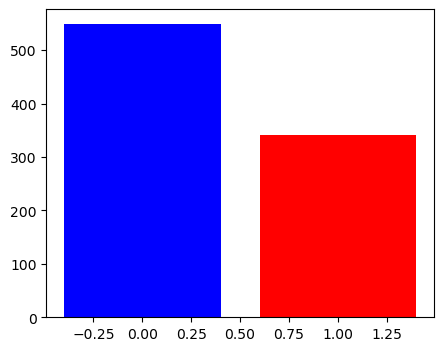

In [9]:
import matplotlib.pyplot as plt
plt.figure (figsize= (5,4))
plt.bar(list(titanic_train['Survived'].value_counts().keys()),list(titanic_train['Survived'].value_counts()), color=["b","r"]) 
plt.show()

In [10]:
titanic_train['Pclass'].value_counts ()

3    491
1    216
2    184
Name: Pclass, dtype: int64

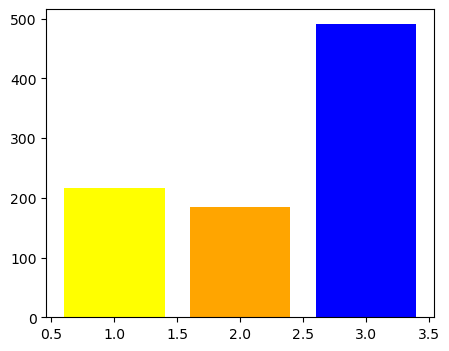

In [11]:
plt.figure(figsize= (5,4))
plt.bar(list(titanic_train['Pclass'].value_counts().keys()),list(titanic_train['Pclass'].value_counts()),color=["blue","yellow","Orange"])
plt.show()

In [12]:
titanic_train['Sex'].value_counts ()

male      577
female    314
Name: Sex, dtype: int64

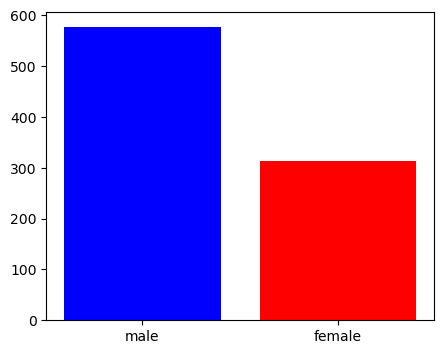

In [13]:
plt.figure(figsize= (5,4))
plt.bar(list(titanic_train['Sex'].value_counts().keys()),list(titanic_train['Sex'].value_counts()),color=["blue","red"])
plt.show()

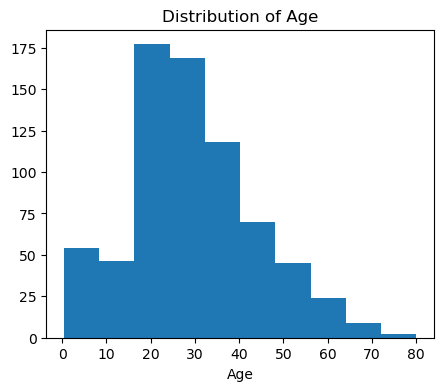

In [14]:
plt.figure(figsize= (5,4))
plt.hist (titanic_train['Age'])
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.show()

In [15]:
(titanic_train['Survived'].isnull())

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Survived, Length: 891, dtype: bool

In [16]:
sum(titanic_train['Survived'].isnull())

0

In [17]:
(titanic_train['Age'].isnull())

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888     True
889    False
890    False
Name: Age, Length: 891, dtype: bool

### dropping the null values

In [18]:
titanic_train=titanic_train.dropna()

In [19]:
sum(titanic_train['Age'].isnull())

0

### Data pre-processing is done so onto the next part

### Buliding a Model

In [20]:
x_train=titanic_train[['Age']]
y_train=titanic_train[['Survived']]

In [21]:
from sklearn.tree import DecisionTreeClassifier

In [22]:
solution= DecisionTreeClassifier()

In [23]:
solution.fit(x_train,y_train)

DecisionTreeClassifier()

In [24]:
sum(titanic_test['Age'].isnull())

86

In [25]:
titanic_test=titanic_test.dropna()

In [26]:
sum(titanic_test['Age'].isnull())

0

In [27]:
x_test=titanic_test[['Age']]

In [28]:
y_predict=solution.predict(x_test)

In [29]:
y_predict

array([1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1])

In [30]:
acc_logistic = round(solution.score(x_train, y_train)*100, 2)

print (acc_logistic)

81.42


In [31]:
titanic_output = pd.DataFrame({'PassengerId': titanic_test.PassengerId, 'Survived': y_predict})
titanic_output.to_csv('pranav_submission.csv', index=False)
print("Submission Done")

Submission Done


### Hence we got the solution and done the submission

# If you like the notebook please upvote it